In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [26]:
#nombre de modalités de chaque variables (dans un dataframe)
def nombre_mod(data2):
    #création d'un dataframe vide
    dff= pd.DataFrame(columns=["VARIABLE","NOMBRE_MOD", "NOMBRE_MOD_SANS_NA"])
    for i in range(data2.shape[1]): # sans compter les valeurs manquantes
        taille =len(data2.iloc[:,i].value_counts(dropna=False))
        taille_1 = len(data2.iloc[:,i].value_counts(dropna=True) )
        dff=dff.append({"VARIABLE": colonnes[i],"NOMBRE_MOD":taille, "NOMBRE_MOD_SANS_NA":taille_1 }, ignore_index=True)
    return dff


# sélection des corrélations les plus importantes
def variables_corr(tableau_corr, seuil):
    colonnes = tableau_corr.columns
    val_temp = 0 
    variables_corr_pos=[] ; variables_corr_pos_val=[]
    variables_corr_neg=[] ; variables_corr_neg_val=[]
    for i in range(tableau_corr.shape[0]):  
        for j in range(tableau_corr.shape[0]):
            if i<j: #i!=j:
                if (tableau_corr.iloc[i,j] > seuil):
                    variables_corr_pos.append(colonnes[j])
                    variables_corr_pos_val.append(round( tableau_corr.iloc[i,j], 2))
                    val_temp += 1

                if (tableau_corr.iloc[i,j] <-seuil):
                    variables_corr_neg.append(colonnes[j])
                    variables_corr_neg_val.append(round( tableau_corr.iloc[i,j], 2))
                    val_temp += 1

        if (len(variables_corr_pos) > 0) | (len(variables_corr_neg) >0) :
            print("variable : ", colonnes[i])
            if len(variables_corr_pos) > 0:    
                print("corr pos", variables_corr_pos)
                print("corr pos", variables_corr_pos_val)
                val_temp += 1

            if len(variables_corr_neg) >0:  
                print("corr neg", variables_corr_neg)
                print("corr neg", variables_corr_neg_val)
                val_temp += 1
            print("")
        variables_corr_pos = variables_corr_pos*0
        variables_corr_neg = variables_corr_pos*0

        variables_corr_pos_val = variables_corr_pos_val*0
        variables_corr_neg_val = variables_corr_pos_val*0
    if val_temp == 0:
        print("IL N'Y A PAS DE CORRELATION ENTRE LES VARIABLES PAR RAPPORT AU SEUIL PRIS")
        


In [20]:
fff= 1
fff+=1
fff

2

In [5]:
# les noms des variables

colonnes =(["IDENT", "TypeHabi", "GeoFaz_Scl", "GeoFaz_cl", "ImmoFaz_Scl", "ImmoFaz_cl", "Anciennete",
            "Logement_prix_m2", "Mediane_RFR", "Sexe", "Prenom_Phase_scl_H", "Prenom_Phase_scl_F",
            "Prenom_Phase_cl_H", "Prenom_Phase_cl_F", "Age_H", "Age_F", "Affinite_1", "Affinite_2",
            "Prenom_effectif", "Potentiel_prenom", "Onoma-Phase_Scl", "Onoma-Phase_CL", "Top_mon"])

In [35]:
#data_orig = pd.read_csv("C:/Users/Christian/Desktop/my_data_FDFIFI19.txt",sep=" " , names = colonnes, low_memory=False, dtype=str )#, dtype='Int64')
data_orig = pd.read_csv("/content/drive/MyDrive/spad_score_method_1/spad_projection_FDFTOT21/my_data_FDFTOT21.txt", delim_whitespace="\t", header = None, names=colonnes, low_memory=False, dtype=str )#, dtype='Int64')
data = data_orig.copy()
print("taille du dataset d'origine : ",data.shape)

taille du dataset d'origine :  (1219999, 23)


In [7]:
# on élimine les variables corrélées et les variables qu'on ne peut pas utiliser
data = data.drop(["GeoFaz_cl", "ImmoFaz_Scl", "ImmoFaz_cl", "Prenom_Phase_cl_H", "Prenom_Phase_cl_F", "Onoma-Phase_Scl", "Onoma-Phase_CL"], axis=1)
data

,IDENT,TypeHabi,GeoFaz_Scl,Anciennete,Logement_prix_m2,Mediane_RFR,Sexe,Prenom_Phase_scl_H,Prenom_Phase_scl_F,Age_H,Age_F,Affinite_1,Affinite_2,Prenom_effectif,Potentiel_prenom,Top_mon
0,000000010010000001,02,81,06,21,21,01,71,41,12,04,20,02,02,01,1
1,000000020010000006,01,75,06,06,13,02,71,64,12,09,04,12,04,13,1
2,000000030010000011,01,76,06,06,16,03,54,81,07,12,06,06,04,18,2
3,000000040010000013,03,75,04,06,13,01,71,36,12,11,11,19,04,06,1
4,000000050010000015,02,33,06,07,12,01,71,42,12,05,14,03,03,01,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219994,010928800370109343,01,64,05,16,17,02,71,81,12,12,21,21,06,21,NaN
1219995,010928810370109344,03,61,06,14,01,04,44,81,05,12,01,05,01,03,NaN
1219996,010928820370109345,02,13,07,07,15,02,71,81,12,12,21,21,06,21,NaN
1219997,010928830370109346,02,31,08,16,19,02,71,45,12,03,02,02,03,01,NaN


In [8]:
(data.isnull()).sum(axis=0)

IDENT                       0
TypeHabi                    0
GeoFaz_Scl                  0
Anciennete                  0
Logement_prix_m2            0
Mediane_RFR                 0
Sexe                        0
Prenom_Phase_scl_H          0
Prenom_Phase_scl_F          0
Age_H                       0
Age_F                       0
Affinite_1                  0
Affinite_2                  0
Prenom_effectif             0
Potentiel_prenom            0
Top_mon               1092884
dtype: int64

In [9]:
for k in range(1,data.shape[1]):
    print(data.iloc[:,k].value_counts(dropna=False)); print("="*50)

02    805993
01    276907
03    136404
04       695
Name: TypeHabi, dtype: int64
31    101566
72     97016
13     69466
75     67308
74     64504
34     63938
37     60249
73     56625
43     55284
76     54319
32     53425
11     52210
71     51406
63     48545
36     36645
64     30811
12     30154
35     29127
25     28346
33     26669
41     19584
14     18232
61     15411
62     11137
15     10788
46      8921
21      8240
22      8102
42      8060
24      7055
45      6235
23      5735
44      4396
51      3721
81      3237
52      2720
53       630
54       182
Name: GeoFaz_Scl, dtype: int64
06    327285
07    257380
05    142642
08    119668
10    112298
04     85054
09     62846
01     56391
03     30474
02     25356
11       605
Name: Anciennete, dtype: int64
07    86917
02    86350
05    78116
01    76851
03    76464
16    68344
09    67130
18    61999
10    61495
12    55923
11    54108
13    54045
19    53121
04    51982
20    51452
14    50924
17    49325
06    45649
15  

In [10]:
# élimination des individus n'ayant pas de valeur pour la variable Top_mon 
"""IMPORTANT"""
data_sans_nan = data[(data.isnull()).sum(axis=1) == 0]

#conversion du type de variable
for i in range(1,data_sans_nan.shape[1]):
    data_sans_nan.iloc[:,i]=data_sans_nan.iloc[:,i].astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [11]:
# tableau de corrélation 
tableau_corr =data_sans_nan.iloc[:,1:-1].corr()
tableau_corr

,TypeHabi,GeoFaz_Scl,Anciennete,Logement_prix_m2,Mediane_RFR,Sexe,Prenom_Phase_scl_H,Prenom_Phase_scl_F,Age_H,Age_F,Affinite_1,Affinite_2,Prenom_effectif,Potentiel_prenom
TypeHabi,1.000000,-0.274047,0.035018,-0.237292,-0.011748,0.080296,-0.052108,0.028394,-0.038210,0.026113,-0.018304,-0.002496,0.016295,0.036598
GeoFaz_Scl,-0.274047,1.000000,-0.062335,0.305789,-0.126996,-0.110657,0.076784,-0.049402,0.056787,-0.043369,0.020785,0.014933,-0.035208,-0.061240
Anciennete,0.035018,-0.062335,1.000000,-0.059871,-0.003845,0.071751,-0.028682,0.031732,-0.021359,0.037181,0.016422,0.027653,0.017967,0.017978
Logement_prix_m2,-0.237292,0.305789,-0.059871,1.000000,0.472028,-0.078050,0.037098,-0.030731,0.014423,-0.066566,-0.003133,-0.051838,-0.029982,-0.017428
Mediane_RFR,-0.011748,-0.126996,-0.003845,0.472028,1.000000,0.011049,-0.024592,0.007959,-0.022305,-0.015746,-0.032874,-0.047394,0.017047,0.040738
Sexe,0.080296,-0.110657,0.071751,-0.078050,0.011049,1.000000,-0.627429,0.500086,-0.584877,0.432034,0.040197,0.036764,0.189882,0.480460
Prenom_Phase_scl_H,-0.052108,0.076784,-0.028682,0.037098,-0.024592,-0.627429,1.000000,-0.422688,0.810324,-0.352010,0.187844,0.392357,-0.076156,-0.566990
Prenom_Phase_scl_F,0.028394,-0.049402,0.031732,-0.030731,0.007959,0.500086,-0.422688,1.000000,-0.403007,0.617393,0.111270,0.067684,0.177519,0.525630
Age_H,-0.038210,0.056787,-0.021359,0.014423,-0.022305,-0.584877,0.810324,-0.403007,1.000000,-0.317166,0.236185,0.401481,0.086865,-0.405863
Age_F,0.026113,-0.043369,0.037181,-0.066566,-0.015746,0.432034,-0.352010,0.617393,-0.317166,1.000000,0.279968,0.403299,0.298051,0.395089


In [27]:
variables_corr(tableau_corr, seuil= 0.90)

IL N'Y A PAS DE CORRELATION ENTRE LES VARIABLES PAR RAPPORT AU SEUIL PRIS


In [28]:
##################################
##########################################
# AVEC VARIABLES SPAD (ACTIVES ET ILLUSTRATIVES)  ET ENCODAGE DUMMIES
##########################################

# test predict individus sans classe
data = data_orig.copy()

# on élimine les variables dons
data=data.drop(["GeoFaz_cl", "ImmoFaz_Scl", "ImmoFaz_cl", "Prenom_Phase_cl_H", "Prenom_Phase_cl_F",
                "Onoma-Phase_Scl", "Onoma-Phase_CL"],axis=1)

# encodage Onehot sur toutes les données (on évite ainsi les erreurs futures)
nb_var = data.shape[1] - 1
data_1_22 = pd.get_dummies(data.iloc[:,1:(data.shape[1]-1)], columns=data.columns[1:(data.shape[1]-1)] )
data_var_qualitatives_temp =  pd.concat([data["IDENT"], data_1_22, data["Top_mon"]], axis=1)
data = data_var_qualitatives_temp
#encodage = OneHotEncoder()
#encodage.fit(data_processing(data.iloc[:,1:nb_var]))

# élimination des individus n'ayant pas de valeur pour la varialbe IFI+
"""IMPORTANT"""
data_sans_nan = data[(data.isnull()).sum(axis=1) == 0]

#conversion du type de variable
for i in range(1,data_sans_nan.shape[1]):
    data_sans_nan.iloc[:,i]=data_sans_nan.iloc[:,i].astype(int)

# base de données avec des variables corrélées et avec encodage OneHot
data =data_sans_nan

nb_var = data.shape[1] - 1
train_set, test_set = train_test_split(data, test_size = 0.2, random_state=0 )

train_X_s = (train_set.iloc[:,1:nb_var]).to_numpy()
train_Y_s = np.asanyarray(train_set.iloc[:,nb_var])

test_X_s = (test_set.iloc[:,1:nb_var]).to_numpy()
test_Y_s = np.asanyarray(test_set.iloc[:,nb_var])




/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [29]:
# tableau de corrélation 
tableau_corr =data_sans_nan.iloc[:,1:-1].corr()
tableau_corr



,TypeHabi_01,TypeHabi_02,TypeHabi_03,TypeHabi_04,GeoFaz_Scl_11,GeoFaz_Scl_12,GeoFaz_Scl_13,GeoFaz_Scl_14,GeoFaz_Scl_15,GeoFaz_Scl_21,GeoFaz_Scl_22,GeoFaz_Scl_23,GeoFaz_Scl_24,GeoFaz_Scl_25,GeoFaz_Scl_31,GeoFaz_Scl_32,GeoFaz_Scl_33,GeoFaz_Scl_34,GeoFaz_Scl_35,GeoFaz_Scl_36,GeoFaz_Scl_37,GeoFaz_Scl_41,GeoFaz_Scl_42,GeoFaz_Scl_43,GeoFaz_Scl_44,GeoFaz_Scl_45,GeoFaz_Scl_46,GeoFaz_Scl_51,GeoFaz_Scl_52,GeoFaz_Scl_53,GeoFaz_Scl_54,GeoFaz_Scl_61,GeoFaz_Scl_62,GeoFaz_Scl_63,GeoFaz_Scl_64,GeoFaz_Scl_71,GeoFaz_Scl_72,GeoFaz_Scl_73,GeoFaz_Scl_74,GeoFaz_Scl_75,...,Affinite_2_09,Affinite_2_10,Affinite_2_11,Affinite_2_12,Affinite_2_13,Affinite_2_14,Affinite_2_15,Affinite_2_16,Affinite_2_17,Affinite_2_18,Affinite_2_19,Affinite_2_20,Affinite_2_21,Prenom_effectif_01,Prenom_effectif_02,Prenom_effectif_03,Prenom_effectif_04,Prenom_effectif_05,Prenom_effectif_06,Potentiel_prenom_01,Potentiel_prenom_02,Potentiel_prenom_03,Potentiel_prenom_04,Potentiel_prenom_05,Potentiel_prenom_06,Potentiel_prenom_07,Potentiel_prenom_08,Potentiel_prenom_09,Potentiel_prenom_10,Potentiel_prenom_11,Potentiel_prenom_12,Potentiel_prenom_13,Potentiel_prenom_14,Potentiel_prenom_15,Potentiel_prenom_16,Potentiel_prenom_17,Potentiel_prenom_18,Potentiel_prenom_19,Potentiel_prenom_20,Potentiel_prenom_21
TypeHabi_01,1.000000,-0.754629,-0.200118,-0.014784,-0.101777,-0.048327,-0.129027,-0.068452,-0.054545,-0.048476,-0.047438,-0.038586,-0.044770,-0.088201,-0.083728,-0.091359,-0.073084,-0.093844,-0.083998,-0.092111,-0.127135,-0.069878,-0.045279,-0.086547,-0.033077,-0.042588,-0.048692,-0.032622,-0.028508,-0.004595,0.010442,0.111870,-0.036916,0.090175,0.098191,0.204570,0.193940,0.296703,0.144911,0.083011,...,-0.028433,0.005534,0.000855,0.006025,-0.007904,0.022559,-0.003570,0.003260,-0.003951,-0.007864,-0.004221,-1.952857e-03,0.038323,0.043199,0.007977,0.000449,0.004682,-0.040450,0.038457,0.042597,0.014229,0.025063,0.028636,0.020229,0.006262,-0.001321,-0.002831,0.023385,0.008554,-0.016336,-0.010351,-0.011701,0.011444,-0.012212,-0.028583,-0.032021,-0.016889,-0.028594,-0.023612,0.038257
TypeHabi_02,-0.754629,1.000000,-0.489543,-0.036166,0.114066,0.049293,0.153182,0.085017,0.065378,0.061384,0.058121,0.045094,0.053286,0.111197,0.071609,0.087374,0.080541,0.091904,0.088236,0.112277,0.148943,0.089427,0.058184,0.090436,0.042736,0.055354,0.061596,0.040132,0.036167,-0.000254,-0.012152,-0.110603,0.039377,-0.104956,-0.101793,-0.209254,-0.199177,-0.282371,-0.197770,-0.134753,...,0.025311,-0.014755,-0.000250,-0.005622,0.005556,-0.019733,0.005565,-0.002501,0.003461,0.007054,0.006269,-7.406277e-04,-0.032290,-0.045851,-0.011938,-0.005036,-0.003288,0.043234,-0.032456,-0.040514,-0.013665,-0.021291,-0.032620,-0.019365,-0.007637,-0.001615,-0.000262,-0.027864,-0.009884,0.015464,0.006557,0.010712,-0.015046,0.016818,0.024793,0.037220,0.020712,0.033041,0.023252,-0.032207
TypeHabi_03,-0.200118,-0.489543,1.000000,-0.009591,-0.034849,-0.009136,-0.057038,-0.035880,-0.025050,-0.027175,-0.023675,-0.015991,-0.019999,-0.048706,0.004880,-0.008714,-0.022955,-0.012144,-0.019920,-0.045082,-0.053226,-0.040580,-0.027254,-0.019712,-0.019815,-0.026009,-0.027196,-0.017369,-0.016084,0.006542,0.004323,0.016953,-0.009582,0.037579,0.022063,0.041418,0.040258,0.028264,0.103696,0.091792,...,-0.000314,0.014929,-0.000263,0.000849,0.002409,-0.000270,-0.003740,-0.000354,0.000252,0.000074,-0.003695,3.708080e-03,-0.002935,0.010018,0.007441,0.006789,-0.000619,-0.010930,-0.002865,0.003557,0.001575,-0.001796,0.010980,0.002288,0.003236,0.004472,0.003878,0.010499,0.003623,-0.001223,0.003489,-0.000642,0.006883,-0.008598,0.000572,-0.012773,-0.008233,-0.011318,-0.003346,-0.002970
TypeHabi_04,-0.014784,-0.036166,-0.009591,1.000000,-0.005252,-0.003971,-0.006433,-0.003331,-0.002632,-0.002323,-0.002284,-0.001862,-0.002157,-0.004284,-0.007607,-0.005783,-0.004057,-0.006316,-0.004375,-0.004719,-0.006225,-0.003377,0.005041,-0.005669,-0.001615,-0.002041,-0.002432,0.008542,-0.001366,-0.000559,-0.000358,-0.003388,-0.002744,-0.005834,-0.004486,-0.005455,-0.00

In [30]:
variables_corr(tableau_corr, seuil= 0.9)

variable :  TypeHabi_04
corr pos ['Anciennete_11']
corr pos [0.92]

variable :  Prenom_Phase_scl_H_71
corr pos ['Age_H_12']
corr pos [1.0]

variable :  Prenom_Phase_scl_F_81
corr pos ['Age_F_12']
corr pos [1.0]

variable :  Affinite_1_21
corr pos ['Affinite_2_21', 'Prenom_effectif_06', 'Potentiel_prenom_21']
corr pos [1.0, 1.0, 1.0]

variable :  Affinite_2_21
corr pos ['Prenom_effectif_06', 'Potentiel_prenom_21']
corr pos [1.0, 1.0]

variable :  Prenom_effectif_06
corr pos ['Potentiel_prenom_21']
corr pos [1.0]



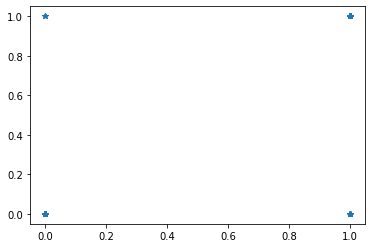

In [32]:
plt.plot(data_sans_nan["TypeHabi_04"], data_sans_nan["Anciennete_11"], '*' )

In [33]:
(data_sans_nan["TypeHabi_04"] - data_sans_nan["Anciennete_11"]).sum()

10

In [38]:
sum(data_sans_nan["TypeHabi_04"])

90

In [40]:
10/90*100, 100-10/90*100

(11.11111111111111, 88.88888888888889)